In [3]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
train_image_generator = None
validation_image_generator = None
test_image_generator = None

train_data_gen = None
val_data_gen = None
test_data_gen = None


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (Assuming Cell 3 code is present here)

# Assign the correct ImageDataGenerator objects to the variables
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # You can add additional transformations here
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# ...


In [7]:
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=20,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=20,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode='binary',
    shuffle=False  # Set shuffle to False for the test dataset
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


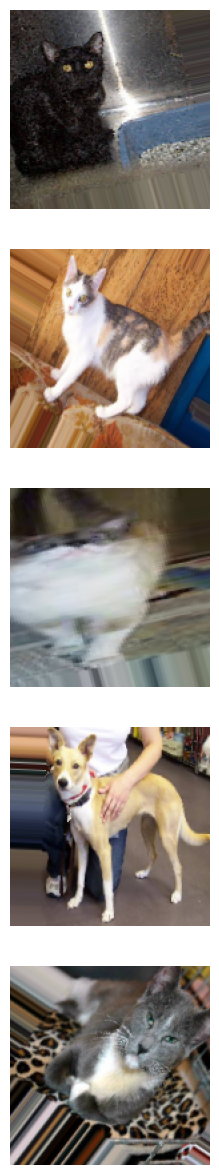

In [8]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [9]:
# 5
train_image_generator = None


Found 2000 images belonging to 2 classes.


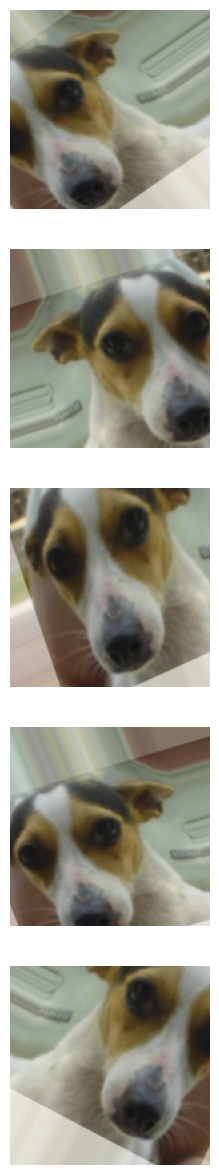

In [10]:
# 6
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (Assuming Cell 3 code is present here)

# Assign the correct ImageDataGenerator objects to the variables
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Make sure batch_size is defined and set to an appropriate value
batch_size = 20

# ... (Assuming the rest of Cell 3 code is present here)

# Now, create the train_data_gen using the train_image_generator
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

# ... (Assuming the rest of the code is present here)


augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the Sequential model
model = Sequential()

# Add Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the output before the fully connected layer
model.add(Flatten())

# Add the fully connected layer with ReLU activation
model.add(Dense(512, activation='relu'))

# Output layer with 1 neuron, representing binary classification (cat or dog)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [24]:
# Set the number of training steps per epoch
steps_per_epoch = train_data_gen.n // train_data_gen.batch_size

# Set the number of validation steps per epoch
validation_steps = val_data_gen.n // val_data_gen.batch_size

# Set the number of epochs for training
epochs = 10  # You can adjust this value as needed

# Train the model using the fit method
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=validation_steps
)


Epoch 1/10
100/100 [==============================] - 25s 253ms/step - loss: 0.6532 - accuracy: 0.6165 - val_loss: 0.6313 - val_accuracy: 0.6570
Epoch 2/10
100/100 [==============================] - 24s 238ms/step - loss: 0.6481 - accuracy: 0.6345 - val_loss: 0.6375 - val_accuracy: 0.6270
Epoch 3/10
100/100 [==============================] - 24s 244ms/step - loss: 0.6443 - accuracy: 0.6320 - val_loss: 0.6177 - val_accuracy: 0.6660
Epoch 4/10
100/100 [==============================] - 24s 242ms/step - loss: 0.6298 - accuracy: 0.6615 - val_loss: 0.5992 - val_accuracy: 0.6880
Epoch 5/10
100/100 [==============================] - 25s 252ms/step - loss: 0.6264 - accuracy: 0.6490 - val_loss: 0.6095 - val_accuracy: 0.6840
Epoch 6/10
100/100 [==============================] - 24s 243ms/step - loss: 0.6023 - accuracy: 0.6720 - val_loss: 0.5726 - val_accuracy: 0.7310
Epoch 7/10
100/100 [==============================] - 23s 235ms/step - loss: 0.5990 - accuracy: 0.6810 - val_loss: 0.6490 - val_ac

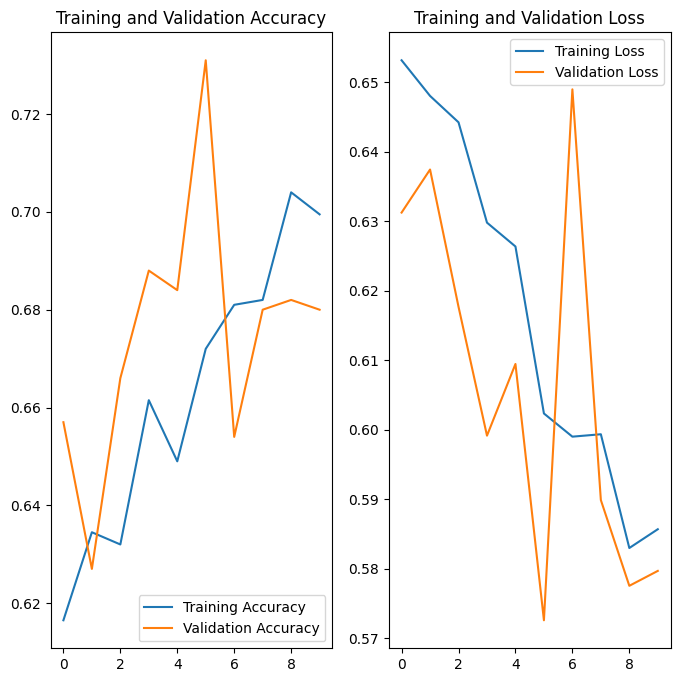

In [25]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
# Reset the test_data_gen generator for proper prediction
test_data_gen.reset()

# Get the number of batches in the test_data_gen generator
num_batches = len(test_data_gen)

# Initialize an empty list to store the probabilities
probabilities = []

# Predict the probabilities for each batch of test images and store them in the list
for _ in range(num_batches):
    images, _ = next(test_data_gen)  # Get the next batch of test images
    batch_probs = model.predict(images)  # Predict probabilities for the batch
    probabilities.extend(batch_probs)  # Add the batch probabilities to the list




In [43]:


# Rest of your code

answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
           1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
           0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
        correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 0.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
